In [74]:
# Import Pandas module
import pandas as pd

# Import NumPy module
import numpy as np

# The following line is a directive that tells matplotlib module to display
# generated graphs inline with the output of your code
%matplotlib inline 

# Import matplotlib module.  Matplotlib module allows us to generate graphs from data
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv("311data.csv")

In [76]:
df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
1,200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
2,201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
3,200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
4,193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT


In [77]:
df.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y
count,494118.000000,494119.000000,454611.000000,454050.000000,4.554500e+05,454050.000000,454050.000000,453823.000000,458346.000000,458346.000000
mean,259274.010615,1.103006,4.830457,16.425248,4.200323e+10,3.061108,16.425248,3.570916,-79.473069,40.187318
std,146951.573219,0.609491,2.539115,8.024759,1.891662e+05,1.455726,8.024759,1.598367,6.306500,3.189062
min,538.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-87.621300,0.000000
25%,133082.250000,1.000000,3.000000,10.000000,4.200311e+10,2.000000,10.000000,2.000000,-80.007694,40.421220
50%,258777.500000,1.000000,5.000000,16.000000,4.200318e+10,3.000000,16.000000,4.000000,-79.977746,40.443717
75%,387035.750000,1.000000,7.000000,22.000000,4.200328e+10,5.000000,22.000000,5.000000,-79.935337,40.461700
max,511880.000000,4.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,0.000000,41.885800


In [78]:
df.dtypes

REQUEST_ID               float64
CREATED_ON                object
REQUEST_TYPE              object
REQUEST_ORIGIN            object
STATUS                     int64
DEPARTMENT                object
NEIGHBORHOOD              object
COUNCIL_DISTRICT         float64
WARD                     float64
TRACT                    float64
PUBLIC_WORKS_DIVISION    float64
PLI_DIVISION             float64
POLICE_ZONE              float64
FIRE_ZONE                 object
X                        float64
Y                        float64
GEO_ACCURACY              object
dtype: object

In [79]:
df.isnull().sum()

REQUEST_ID                   1
CREATED_ON                   0
REQUEST_TYPE                 0
REQUEST_ORIGIN               0
STATUS                       0
DEPARTMENT                4317
NEIGHBORHOOD             40210
COUNCIL_DISTRICT         39508
WARD                     40069
TRACT                    38669
PUBLIC_WORKS_DIVISION    40069
PLI_DIVISION             40069
POLICE_ZONE              40296
FIRE_ZONE                39897
X                        35773
Y                        35773
GEO_ACCURACY                 0
dtype: int64

In [80]:
df['NEIGHBORHOOD'].value_counts()

Brookline               20386
Carrick                 19419
South Side Slopes       16176
Squirrel Hill South     16108
South Side Flats        14665
                        ...  
East Carnegie             455
Northview Heights         454
Glen Hazel                305
Arlington Heights          97
Mount Oliver Borough       59
Name: NEIGHBORHOOD, Length: 91, dtype: int64

In [81]:
df['NEIGHBORHOOD'].value_counts()/20386

Brookline               1.000000
Carrick                 0.952565
South Side Slopes       0.793486
Squirrel Hill South     0.790150
South Side Flats        0.719366
                          ...   
East Carnegie           0.022319
Northview Heights       0.022270
Glen Hazel              0.014961
Arlington Heights       0.004758
Mount Oliver Borough    0.002894
Name: NEIGHBORHOOD, Length: 91, dtype: float64

<AxesSubplot:>

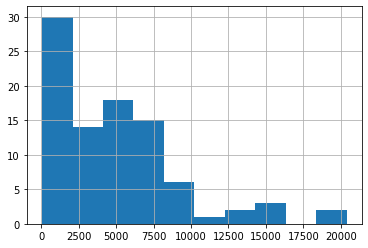

In [82]:
df['NEIGHBORHOOD'].value_counts().hist()

In [83]:
df1 = pd.DataFrame( {'Neighborhood' : df['NEIGHBORHOOD'].value_counts().nsmallest(20)})
df1

,Neighborhood
Mount Oliver Borough,59
Arlington Heights,97
Glen Hazel,305
Northview Heights,454
East Carnegie,455
Ridgemont,522
Chartiers City,608
St. Clair,680
Fairywood,799
Hays,823


In [84]:
df2 = pd.DataFrame( {'rank' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]} )

In [88]:
df1.reset_index(inplace=True)

In [89]:
df1

,index,Neighborhood
0,Mount Oliver Borough,59
1,Arlington Heights,97
2,Glen Hazel,305
3,Northview Heights,454
4,East Carnegie,455
5,Ridgemont,522
6,Chartiers City,608
7,St. Clair,680
8,Fairywood,799
9,Hays,823


In [90]:
df3 = pd.DataFrame( {'Neighborhood' : df1['index'], 'rank' : df2['rank']})

In [91]:
df3.head(20)

,Neighborhood,rank
0,Mount Oliver Borough,1
1,Arlington Heights,2
2,Glen Hazel,3
3,Northview Heights,4
4,East Carnegie,5
5,Ridgemont,6
6,Chartiers City,7
7,St. Clair,8
8,Fairywood,9
9,Hays,10
